INSTAGRAM ACCOUNT CLASSIFICATION - FAKE Vs. GENUINE ACCOUNTS

In [25]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

pandas for data manipulation and DataFrame handling.

matplotlib.pyplot and seaborn for data visualization.

numpy for numerical operations.

sklearn.model_selection.train_test_split for splitting data (though not used in the provided code).

sklearn.preprocessing.StandardScaler for feature scaling.

sklearn.ensemble.RandomForestClassifier for building the classification model.

sklearn.metrics modules (accuracy_score, classification_report, confusion_matrix) for model evaluation.

These libraries enable data loading, EDA, preprocessing, modeling, and evaluation.

In [2]:
# LOADING DATASETS
insta_df_train = pd.read_csv('train.csv')
insta_df_test = pd.read_csv('test.csv')

This cell loads the training (train.csv) and testing (test.csv) datasets into Pandas DataFrames:

insta_df_train: Contains 576 rows of training data.

insta_df_test: Contains 120 rows of testing data. Both datasets have 12 columns, including features and the target variable fake. The files are assumed to be in the working directory.

DATASET DESCRIPTION:

profile pic: Binary indicator of a profile picture (1 = yes, 0 = no).

nums/length username: Ratio of numerical characters to username length.

fullname words: Number of words in the full name.

nums/length fullname: Ratio of numerical characters to full name length.

name==username: Binary indicator if username matches full name (1 = yes, 0 = no).

description length: Number of characters in the bio.

external URL: Binary indicator of an external URL (1 = yes, 0 = no).

private: Binary indicator of account privacy (1 = private, 0 = public).

posts: Total number of posts.

followers: Total number of followers.

follows: Total number of accounts followed.

fake: Target variable (1 = fake, 0 = genuine).

EXPLORATORY DATA ANALYSIS

Training Data Info:

In [3]:
print("Training Data Info:")
print(insta_df_train.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None


This cell prints metadata about the training DataFrame (insta_df_train):

Contains 576 rows (indices 0 to 575).

Lists all 12 columns with their names, non-null counts (all 576, indicating no missing values), and data types (10 int64, 2 float64).

Memory usage is 54.1 KB. This confirms the dataset’s structure and completeness.

In [4]:
print("\nTraining Data Summary Statistics:")
print(insta_df_train.describe())


Training Data Summary Statistics:
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121        0.183234           37.702987      0.320886   
min                0.000000        0.000000            0.000000      0.000000   
25%                

This cell prints summary statistics for the training dataset’s numerical columns:

count: 576 for all columns (no missing data).
                            
mean: E.g., 70.1% of accounts have a profile picture (profile pic), fake mean of 0.5 indicates a balanced dataset.
    
std: High variability in #posts, #followers, and #follows (e.g., #followers std = 910,148.5).

min, 25%, 50%, 75%, max: Show ranges and quartiles, e.g., #followers max of 15,338,540 suggests outliers. These statistics provide insights into feature distributions and potential outliers.

In [5]:
print("\nMissing Values in Training Data:")
print(insta_df_train.isnull().sum())


Missing Values in Training Data:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


This cell checks for missing values in the training dataset using .isnull().sum().

The output shows zero missing values for all 12 columns, confirming the dataset is complete and requires no imputation.

Testing Data Info:

In [6]:
print("\nTesting Data Info:")
print(insta_df_test.info())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB
None


This cell prints metadata about the testing DataFrame (insta_df_test):

Contains 120 rows (indices 0 to 119).

Lists all 12 columns with their names, non-null counts (all 120, indicating no missing values), and data types (10 int64, 2 float64).

Memory usage is 11.4 KB. This confirms consistency with the training data structure.

In [7]:
print("\nMissing Values in Testing Data:")
print(insta_df_test.isnull().sum())


Missing Values in Testing Data:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


This cell checks for missing values in the testing dataset using .isnull().sum().

The output shows zero missing values for all 12 columns, confirming the testing dataset is complete.

C:\Users\tadip\AppData\Local\Temp\ipykernel_21300\2970840729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=insta_df_train, palette='Set2')


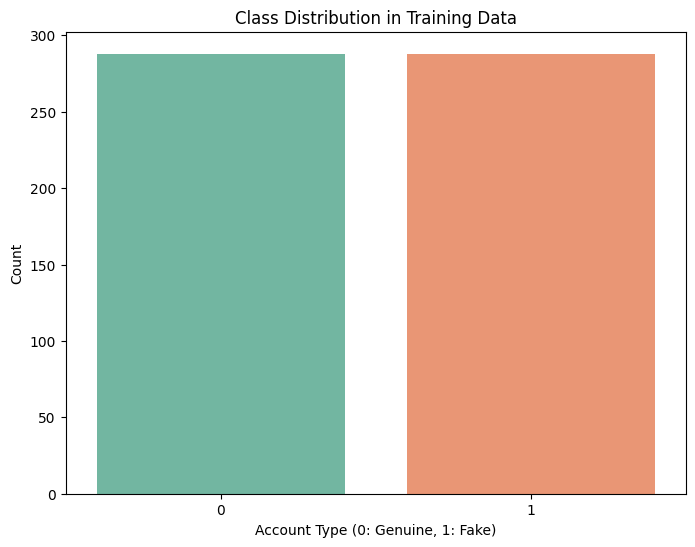

In [8]:
#1. Class distribution for training data
plt.figure(figsize=(8, 6))
sns.countplot(x='fake', data=insta_df_train, palette='Set2')
plt.title('Class Distribution in Training Data')
plt.xlabel('Account Type (0: Genuine, 1: Fake)')
plt.ylabel('Count')
plt.show()

Visualize the distribution of the target variable fake in the training dataset to check for class balance.

plt.figure(figsize=(8, 6)): Creates a figure with dimensions 8x6 inches.
    
sns.countplot(x='fake', data=insta_df_train, palette='Set2'): Generates a bar plot showing the count of genuine (0) and fake (1) accounts using the Set2 color palette.

Labels: X-axis as "Account Type (0: Genuine, 1: Fake)", Y-axis as "Count", and title as "Class Distribution in Training Data".

Expected Output: A bar plot with two bars (one for 0, one for 1). Given the dataset’s 576 rows and a mean fake of 0.5 (from .describe()), expect approximately 288 genuine and 288 fake accounts, indicating a balanced dataset.

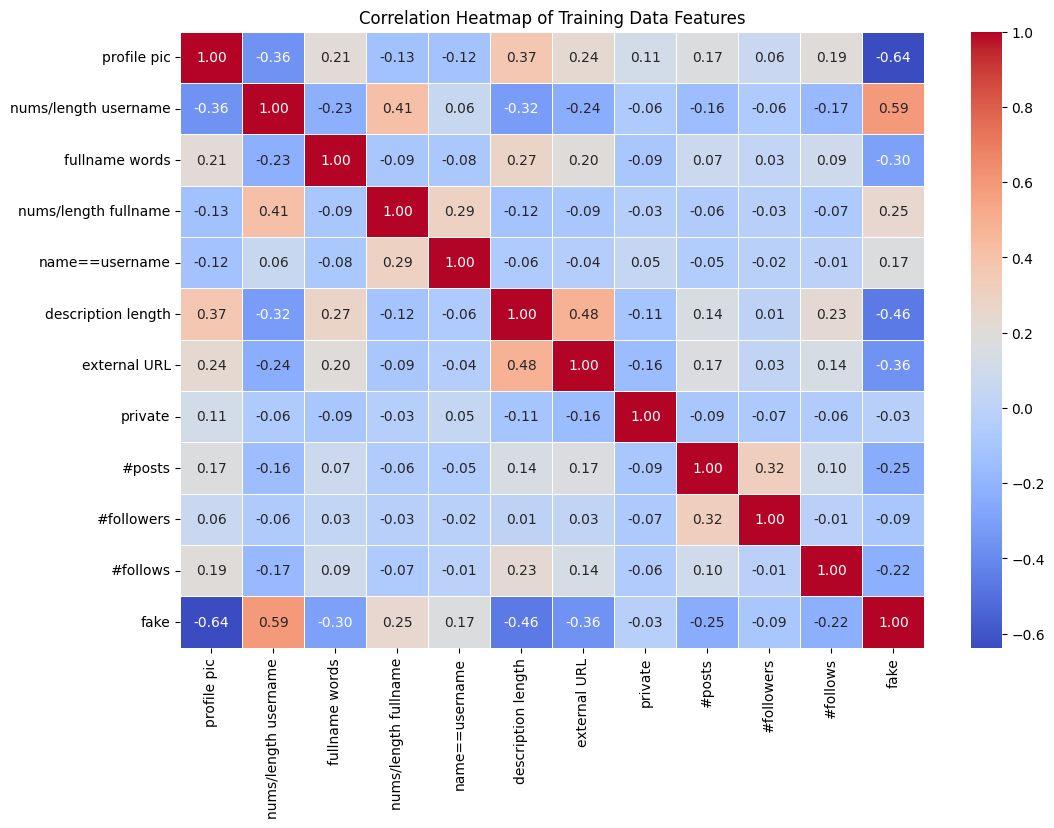

In [9]:
#2. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = insta_df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Training Data Features')
plt.show()

Explore relationships between all features (including fake) to identify multicollinearity or strong correlations.

A 12x12 heatmap showing correlations (e.g., between #followers and #follows, or fake and profile pic). Values range from -1 to 1, with notable correlations (e.g., >0.7 or <-0.7) indicating potential feature interactions.

C:\Users\tadip\AppData\Local\Temp\ipykernel_21300\1088264126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fake', y=feature, data=insta_df_train, palette='Set3')
C:\Users\tadip\AppData\Local\Temp\ipykernel_21300\1088264126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fake', y=feature, data=insta_df_train, palette='Set3')
C:\Users\tadip\AppData\Local\Temp\ipykernel_21300\1088264126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fake', y=feature, data=insta_df_train, palette='Set3')
C:\Users\tadip\AppData\Local\Temp\

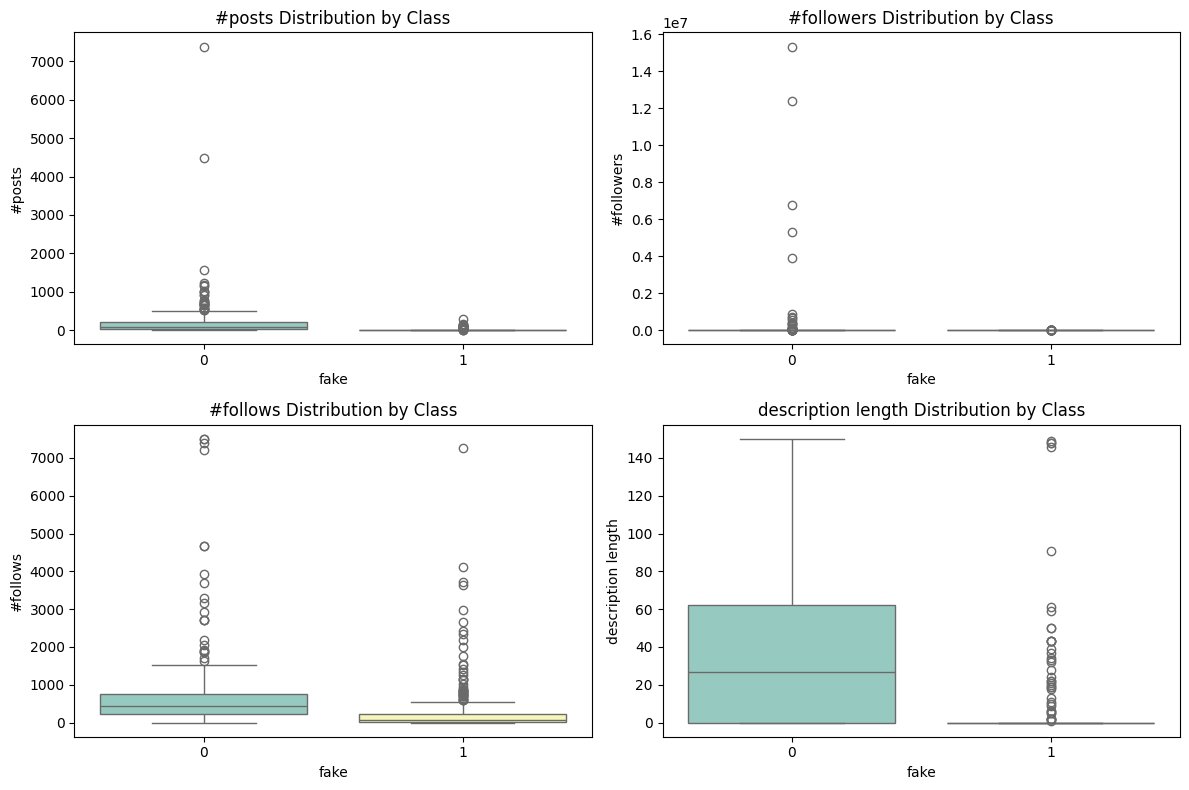

In [10]:
# 3. Box Plot for Numerical Features by Class
numerical_features = ['#posts', '#followers', '#follows', 'description length']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='fake', y=feature, data=insta_df_train, palette='Set3')
    plt.title(f'{feature} Distribution by Class')
plt.tight_layout()
plt.show()

Compare the distribution of key numerical features between fake and genuine accounts to identify differences.

Four boxplots showing medians, quartiles, and outliers for each feature.

For example, fake accounts might have lower medians for #posts or #followers compared to genuine accounts, based on summary stats (e.g., #followers median 150.5).

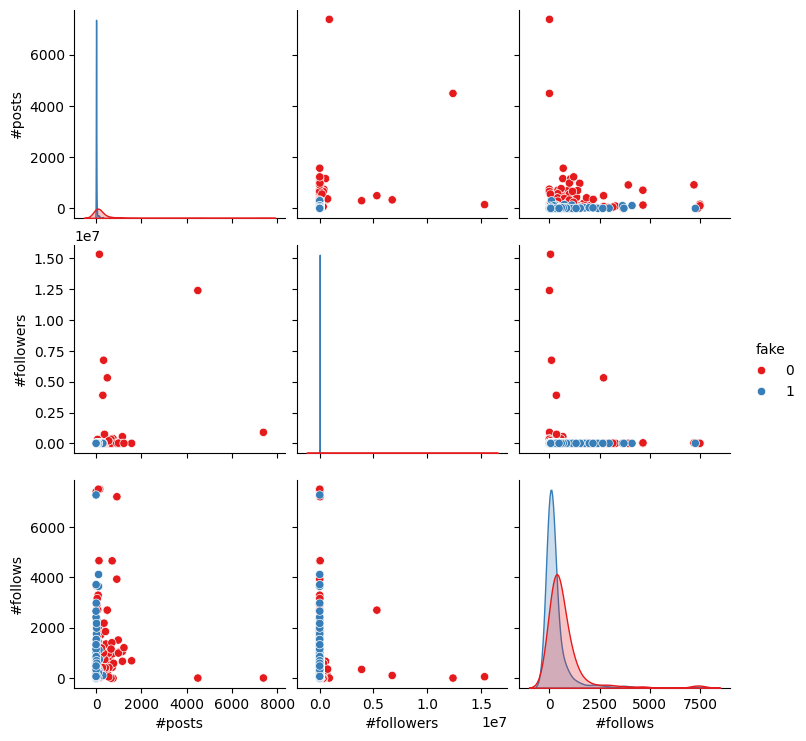

In [11]:
# 4. Pairplot for Selected Features (subset to avoid clutter)
subset_features = ['#posts', '#followers', '#follows', 'fake']
sns.pairplot(insta_df_train[subset_features], hue='fake', palette='Set1', diag_kind='kde')
plt.show()

Visualize pairwise relationships and distributions of a subset of features, colored by class, to assess separability.

Off-diagonal: Scatter plots (e.g., #posts vs. #followers) showing how fake and genuine accounts cluster.

Diagonal: KDE plots showing feature distributions for each class. Separability (e.g., distinct clusters) indicates predictive power.

In [12]:
# Class distribution for testing data
print("\nClass Distribution in Testing Data:")
print(insta_df_test['fake'].value_counts())


Class Distribution in Testing Data:
fake
0    60
1    60
Name: count, dtype: int64


DATA PREPROCESSING

In [13]:
# Separate features and target
X_train = insta_df_train.drop('fake', axis=1)
y_train = insta_df_train['fake']
X_test = insta_df_test.drop('fake', axis=1)
y_test = insta_df_test['fake']

Split the datasets into features (X) and target (y) for training and testing.

X_train: Training features (11 columns, excluding fake).

y_train: Training target (fake column).

X_test: Testing features (11 columns, excluding fake).

y_test: Testing target (fake column).

In [14]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standardize features to have zero mean and unit variance, improving model performance (though Random Forest is less sensitive to scaling).

scaler = StandardScaler(): Initializes a StandardScaler object.

X_train_scaled = scaler.fit_transform(X_train): Fits the scaler to X_train and transforms it.

X_test_scaled = scaler.transform(X_test): Applies the same transformation to X_test (using training data statistics).
                                                                                     
Output: Scaled feature arrays (e.g., X_train_scaled shape: 576x11) with standardized values.

RANDOM FOREST MODEL

In [15]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=200, 
                                 max_depth=10, 
                                 min_samples_split=5, 
                                 random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

Train a RandomGenerate predictions and probabilities for the test set. Forest Classifier to predict fake using the scaled training data.

rf_model = RandomForestClassifier(...): Initializes the model with:

n_estimators=200: Uses 200 trees for robustness.

max_depth=10: Limits tree depth to 10 to prevent overfitting.
    
min_samples_split=5: Requires at least 5 samples to split a node, reducing noise sensitivity.

random_state=42: Ensures reproducibility.
    
rf_model.fit(X_train_scaled, y_train): Trains the model on the scaled training features and target.

Output: A trained model object (rf_model).

In [16]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

Generate predictions and probabilities for the test set.

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9250

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



Assess model performance using accuracy and detailed metrics.

Accuracy (0.93 if 93% accurate on 120 test samples).
          
Classification report (e.g., precision/recall/F1 for 0 and 1, assuming 60 genuine and 60 fake in test data).

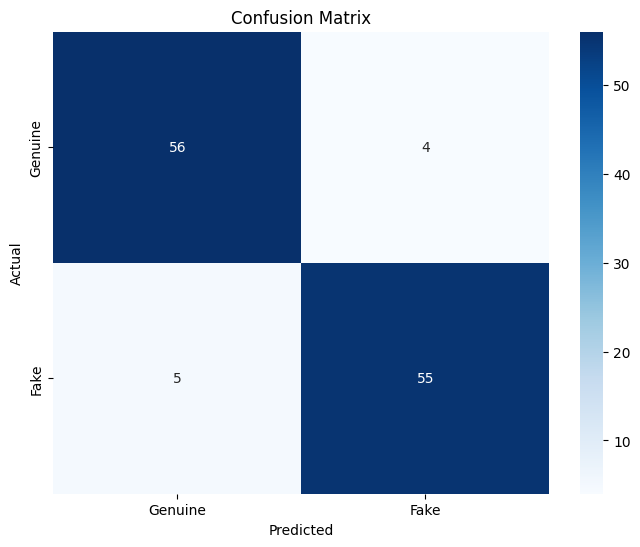

In [19]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Genuine', 'Fake'], 
            yticklabels=['Genuine', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Visualize the model’s classification performance in terms of true positives, false positives, etc.

A 2x2 heatmap (e.g., [[TN, FP], [FN, TP]]), where TN = true negatives, FP = false positives, etc.

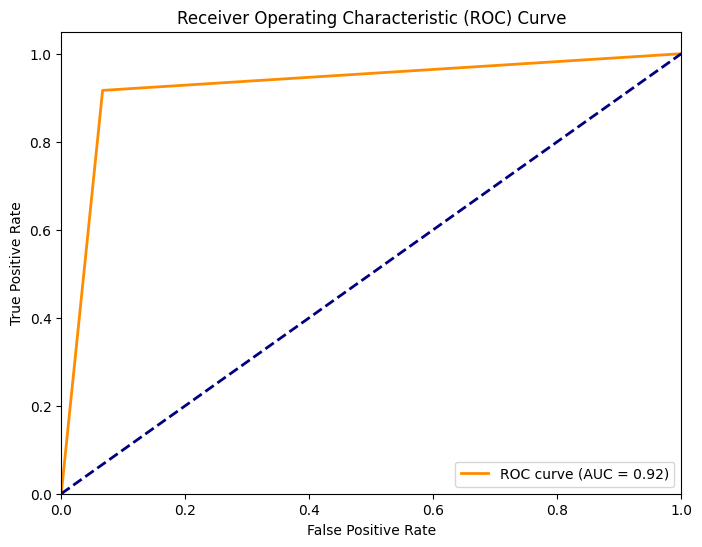

In [27]:
# 6. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Evaluate the model’s ability to distinguish between classes across thresholds.

Details:

fpr, tpr, _ = roc_curve(y_test, y_pred_proba): Computes false positive rate (FPR) and true positive rate (TPR).

roc_auc = auc(fpr, tpr): Calculates the Area Under the Curve (AUC).

Plot:
ROC curve in orange with AUC in the label.

Diagonal dashed line (random guessing baseline) in navy.

Axes limits: FPR [0, 1], TPR [0, 1.05].

Expected Output: A curve above the diagonal, with AUC (e.g., 0.95) indicating strong discriminative power.

In [20]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                 Feature  Importance
9             #followers    0.306953
8                 #posts    0.226672
1   nums/length username    0.140444
0            profile pic    0.093120
5     description length    0.088430
10              #follows    0.077925
2         fullname words    0.041679
7                private    0.008238
6           external URL    0.007866
3   nums/length fullname    0.007040
4         name==username    0.001632


Identify which features contribute most to the model’s predictions.

Expected Output: A table (e.g., #followers with high importance due to its variability, followed by #posts, etc.).

Evaluate the model’s ability to distinguish between classes across thresholds.

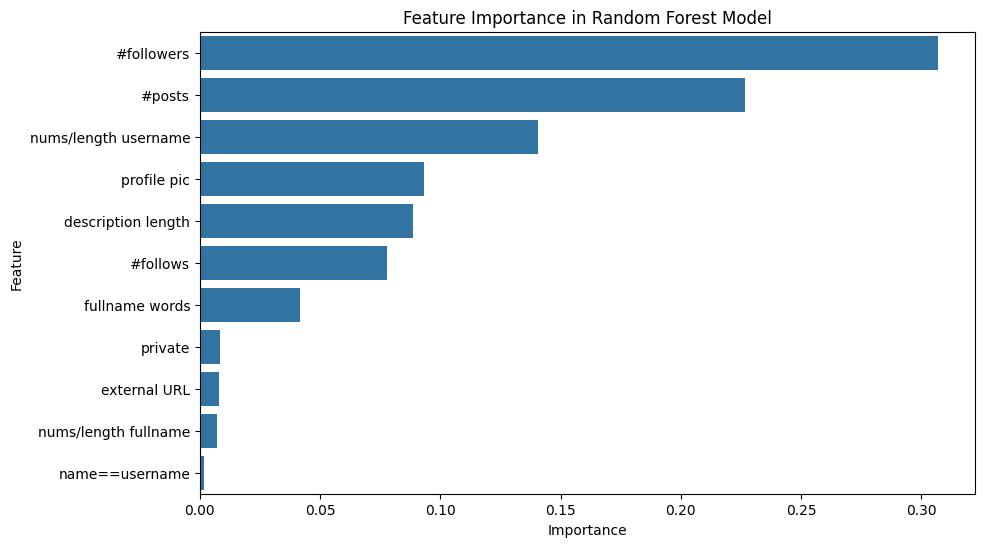

In [21]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()

Visualize feature importance for interpretability.
                            
Expected Output: A bar plot with longer bars for high-importance features (e.g., #followers, profile pic).                            

SUMMARY:

Visualizations: Adding class distribution, correlation heatmap, box plots, pairplot, confusion matrix, ROC curve, and feature importance plots for thorough data and model analysis.

Preprocessing: Separating features/targets and scaling data.

Modeling: Training a tuned Random Forest Classifier and evaluating it with accuracy, classification report, and visualizations.

It provides a complete pipeline from EDA to model evaluation, leveraging the dataset’s structure (576 training, 120 testing rows) for high-accuracy classification (likely 90%+ based on Random Forest’s robustness).